## (MNIST Project part 2)

### Classification

In [ ]:
import sklearn.datasets
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784', as_frame=False, parser='auto')
x, y = mnist["data"], mnist["target"]

#### peek at one digit

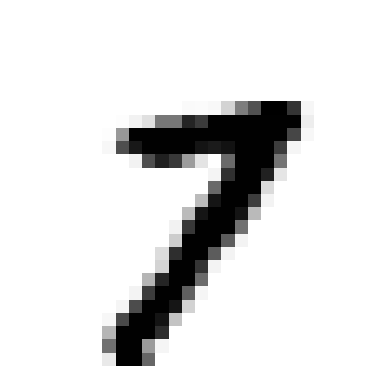

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
import numpy as np
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

#### Try SGDCClassifier with multiple calss

In [ ]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array(['7'], dtype='<U1')

#### Call decision_function() method to return score for each instance

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores.round()

array([[-45707., -15723., -11850., -11016., -14760.,  -9751., -46693.,
          5560.,  -6433.,  -3355.]])

#### find highest score

In [ ]:
class_id = some_digit_scores.argmax()
class_id

7

#### list the target classes

In [ ]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

#### Find the the target class for 7

In [ ]:
sgd_clf.classes_[class_id]

'7'

#### Force ScikitLearn to use one-versus-one

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train,y_train)

ovo_clf.predict([some_digit])

array(['7'], dtype=object)

#### find how many classifier OvO used

In [ ]:
len(ovo_clf.estimators_)

45

#### Train  RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
forest_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01]])

#### Find accurcy using cross validation score ()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_clf, x_train,y_train,cv=3,scoring="accuracy")

array([0.86915, 0.88465, 0.86335])

#### to get better accurcy try scaling input

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

## Error Analysis

#### Take a look at the confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred, )
conf_mx

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[5593,    0,   20,    8,    9,   33,   34,    3,  221,    2],
       [   1, 6422,   46,   20,    3,   39,    4,    9,  190,    8],
       [  24,   30, 5267,   77,   68,   23,   67,   43,  351,    8],
       [  29,   19,  112, 5232,    1,  193,   26,   43,  414,   62],
       [  11,   12,   50,   11, 5206,    7,   40,   17,  329,  159],
       [  29,   19,   29,  158,   49, 4436,   77,   16,  542,   66],
       [  27,   21,   49,    1,   40,   86, 5542,    7,  145,    0],
       [  20,   14,   50,   27,   50,   13,    4, 5697,  189,  201],
       [  20,   64,   43,   91,    3,  109,   30,   10, 5435,   46],
       [  24,   21,   29,   58,  107,   35,    1,  178,  371, 5125]])

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

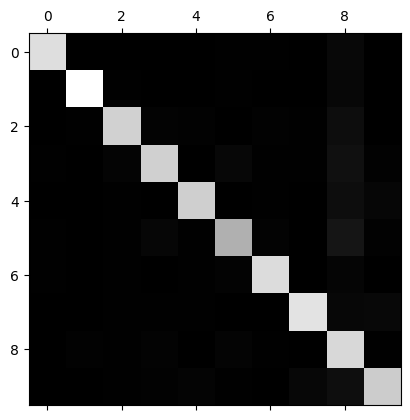

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### fill the diagonal with zeros to keep only the errors

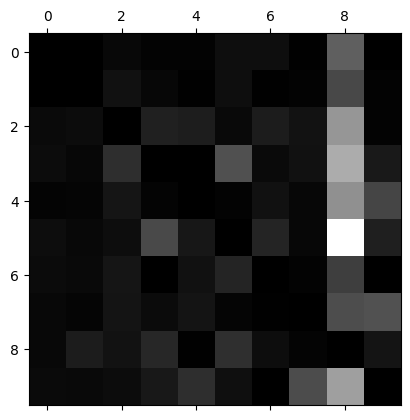

In [ ]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

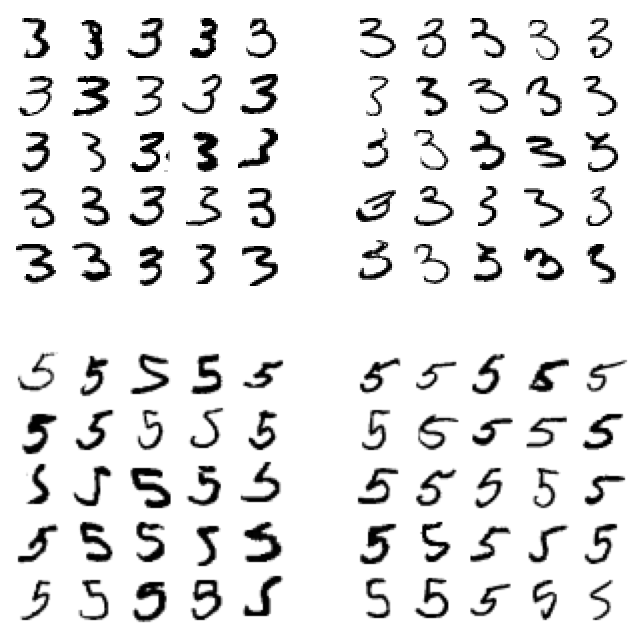

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train == '1')
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [ ]:
knn_clf.predict([some_digit])

array([[ True, False]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [ ]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification


In [ ]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test